## Accessing Sentinel-5P data with Python

Sentinel-5P data was made available July 2018 (after launch in October 2017). The data is supplied by the scihub in the form of .nc files. (netcdf
<br><br>
https://scihub.copernicus.eu/
<br><br>
You will need netCDF4 library in Python
<br><br>
conda install -c anaconda netcdf4 

### A brief guide to accessing and displaying Sentinel-5P data
<br> <br>
import the necessary libraries

In [1]:
import netCDF4 as nc4

In [2]:
from netCDF4 import Dataset
import numpy as np

Load the .nc file as read only

In [3]:
my_example_nc_file = 'S5P_NRTI_L2__NO2____20180716T122509_20180716T123009_03918_01_010002_20180716T131625.nc'
fh = Dataset(my_example_nc_file, mode='r')

examine the contents of the file

In [4]:
print (fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    history: 2018-07-16 13:17:50 f_s5pops tropnll2dp /mnt/data1/storage_nrt/cache_nrt/WORKING-561005767/JobOrder.561005597.xml
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km, processed in degraded mode
    tracking_id: 22651536-1e06-4299-ba05-f70541604936
    id: S5P_NRTI_L2__NO2____20180716T122509_20180716T123009_03918_01_010002_20180716T131625
    time_reference: 2018-07-16T00:00:00Z
    time_reference_days_since_1950: 25033
    time_reference_julian_day: 2458315.5
    time_reference_seconds_since_1970: 1531699200
    time_coverage_start: 2018-07-16T12:25:03Z
    time_coverage_end: 2018-07-16T12:30:15Z
    time_coverage_duration: PT312.000S
    time_coverage_resolution: PT1.080S
    orbit: 3918
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processo

Find the file format

In [5]:
print (fh.file_format)

NETCDF4


What groups are in the data?

In [6]:
print (fh.groups)

OrderedDict([('PRODUCT', <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(278), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixel

examine the product group

In [7]:
print (fh.groups['PRODUCT'])

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(278), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixel), float32 averaging_kern

In [8]:
print (fh.groups['PRODUCT'].dimensions)

OrderedDict([('scanline', <class 'netCDF4._netCDF4.Dimension'>: name = 'scanline', size = 278
), ('ground_pixel', <class 'netCDF4._netCDF4.Dimension'>: name = 'ground_pixel', size = 450
), ('corner', <class 'netCDF4._netCDF4.Dimension'>: name = 'corner', size = 4
), ('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1
), ('polynomial_exponents', <class 'netCDF4._netCDF4.Dimension'>: name = 'polynomial_exponents', size = 6
), ('intensity_offset_polynomial_exponents', <class 'netCDF4._netCDF4.Dimension'>: name = 'intensity_offset_polynomial_exponents', size = 1
), ('layer', <class 'netCDF4._netCDF4.Dimension'>: name = 'layer', size = 34
), ('vertices', <class 'netCDF4._netCDF4.Dimension'>: name = 'vertices', size = 2
)])


In [9]:
print (fh.groups['PRODUCT'].dimensions.keys())

odict_keys(['scanline', 'ground_pixel', 'corner', 'time', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices'])


In [10]:
print (fh.groups['PRODUCT'].dimensions['time']) 


<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1



examine the group Metadata

In [11]:
print (fh.groups['METADATA'])

<class 'netCDF4._netCDF4.Group'>
group /METADATA:
    dimensions(sizes): 
    variables(dimensions): 
    groups: QA_STATISTICS, ALGORITHM_SETTINGS, GRANULE_DESCRIPTION, ISO_METADATA, EOP_METADATA, ESA_METADATA



Variables are where all the data we will use are stored. Print this to inspect

In [12]:
print (fh.groups['PRODUCT'].variables)

OrderedDict([('scanline', <class 'netCDF4._netCDF4.Variable'>
int32 scanline(scanline)
    units: 1
    axis: Y
    long_name: along-track dimension index
    comment: This coordinate variable defines the indices along track; index starts at 0
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (278,)
filling on), ('ground_pixel', <class 'netCDF4._netCDF4.Variable'>
int32 ground_pixel(ground_pixel)
    units: 1
    axis: X
    long_name: across-track dimension index
    comment: This coordinate variable defines the indices across track, from west to east; index starts at 0
    _FillValue: -2147483647
path = /PRODUCT
unlimited dimensions: 
current shape = (450,)
filling on), ('time', <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: seconds since 2010-01-01 00:00:00
    standard_name: time
    axis: T
    long_name: reference time for the measurements
    comment: The time in this variable corresponds to the time in the time_reference global 

In [13]:
print (fh.groups['PRODUCT'].variables.keys())

odict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


Get the data about nitrogendioxide_tropospheric_column_precision

In [14]:
print (fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'])

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column_precision(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide standard_error
    long_name: Precision of the tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    multiplication_factor_to_convert_to_molecules_percm2: 6.022141e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 278, 450)
filling on


I am indebted to this post and the code below is adapted from here <br>
http://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/

<br>
<br>
We need to convert the 3d array to a 2d array

In [15]:
##http://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/



lons = fh.groups['PRODUCT'].variables['longitude'][:][0,:,:]
lats = fh.groups['PRODUCT'].variables['latitude'][:][0,:,:]
no2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'][0,:,:]
print (lons.shape)
print (lats.shape)
print (no2.shape)


no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column_precision'].units


(278, 450)
(278, 450)
(278, 450)


Plot the data

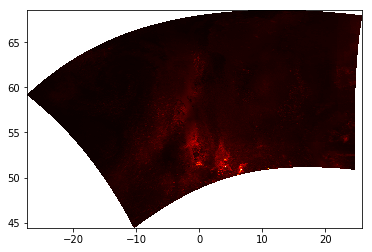

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.scatter(lons, lats, tmax, c= 'red')
#plt.show()

plt.figure()
plt.pcolor(lons, lats, no2, cmap='hot')
plt.show()

plot the data on a lognormal scale

C:\Users\andre\Anaconda3\lib\site-packages\matplotlib\image.py:401: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / 0.8)


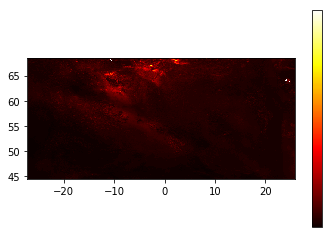

In [17]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

plt.imshow(no2+10, extent=(np.amin(lons), np.amax(lons), np.amin(lats), np.amax(lats)),
        cmap=cm.hot, norm=LogNorm())
plt.colorbar()
plt.show()

## final plot!
<br>
Geographically plot

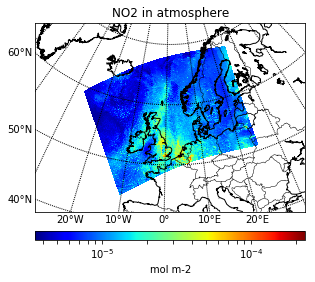

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(no2),norm=LogNorm(), cmap='jet')

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title('NO2 in atmosphere')

plt.show()